# Visão Computacional - Lista 7

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1 - Separando em Teste e Treinamento

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

classes = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

In [3]:
print(x_train.shape[0], x_test.shape[0])

50000 10000


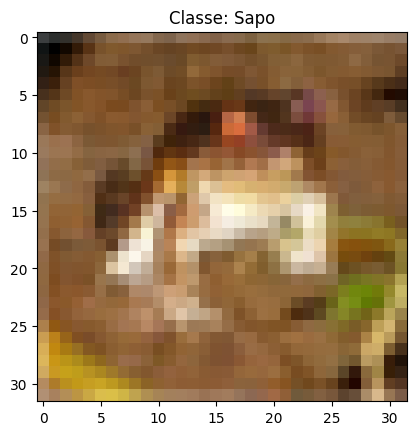

In [4]:
plt.imshow(x_train[0])
plt.title('Classe: Sapo')
plt.show()

# 2 - Arquitetura da Rede

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\silla\Desktop\Trabalhos\Visao_Computacional_2024.1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3 - Treinamento

In [6]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3350 - loss: 1.7869 - val_accuracy: 0.5099 - val_loss: 1.3489
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5280 - loss: 1.3036 - val_accuracy: 0.5811 - val_loss: 1.1784
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6061 - loss: 1.1074 - val_accuracy: 0.6254 - val_loss: 1.0567
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6480 - loss: 0.9903 - val_accuracy: 0.6458 - val_loss: 0.9904
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6784 - loss: 0.9036 - val_accuracy: 0.6852 - val_loss: 0.8915
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7114 - loss: 0.8249 - val_accuracy: 0.6828 - val_loss: 0.8882
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7313 - loss: 0.7688 - val_accuracy: 0.6933 - val_loss: 0.8749
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7419 - loss: 0.7341 - 

# 4 - Classificação

In [7]:
im_nova = cv2.imread('./Imagem_32x32.png')
if np.max(im_nova) > 1:
    im_nova = im_nova / 255.0
nova_entrada = np.expand_dims(im_nova, axis=0)
previsoes = model.predict(nova_entrada)
predicted_class = np.argmax(previsoes)

print("Previsoes: ", previsoes)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Previsoes:  [[8.5271485e-02 1.9068219e-04 6.9148801e-02 2.3018730e-01 1.0515630e-03
  4.0285239e-01 4.6541207e-03 3.3188369e-02 2.1627143e-03 1.7129263e-01]]
Predicted class: 5


Cachorro


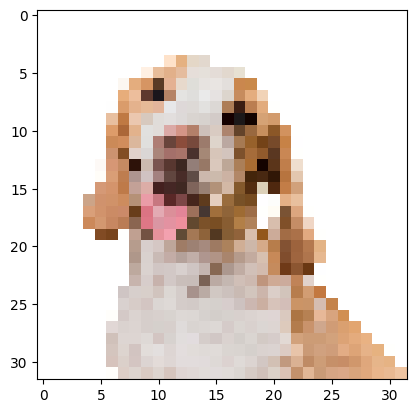

In [8]:
print(classes[predicted_class])
plt.imshow(im_nova[:,:,::-1])
plt.show()

In [9]:
im_nova = cv2.imread('./Imagem_32x32 (2).png')
if np.max(im_nova) > 1:
    im_nova = im_nova / 255.0
nova_entrada = np.expand_dims(im_nova, axis=0)
previsoes = model.predict(nova_entrada)
predicted_class = np.argmax(previsoes)

print("Previsoes: ", previsoes)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Previsoes:  [[3.6635906e-02 3.1805273e-05 6.9745429e-02 7.1874477e-02 6.8773032e-04
  6.1372030e-01 5.3888717e-04 1.8748249e-01 1.9664651e-04 1.9086270e-02]]
Predicted class: 5


Cachorro


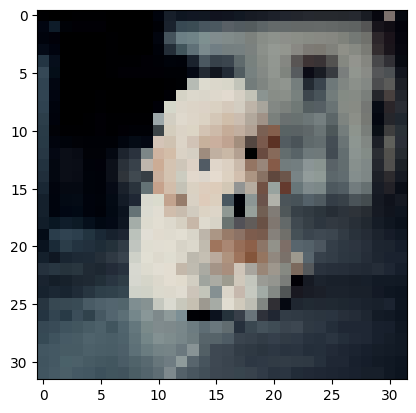

In [10]:
print(classes[predicted_class])
plt.imshow(im_nova[:,:,::-1])
plt.show()

# 5 - Exibindo as convoluções

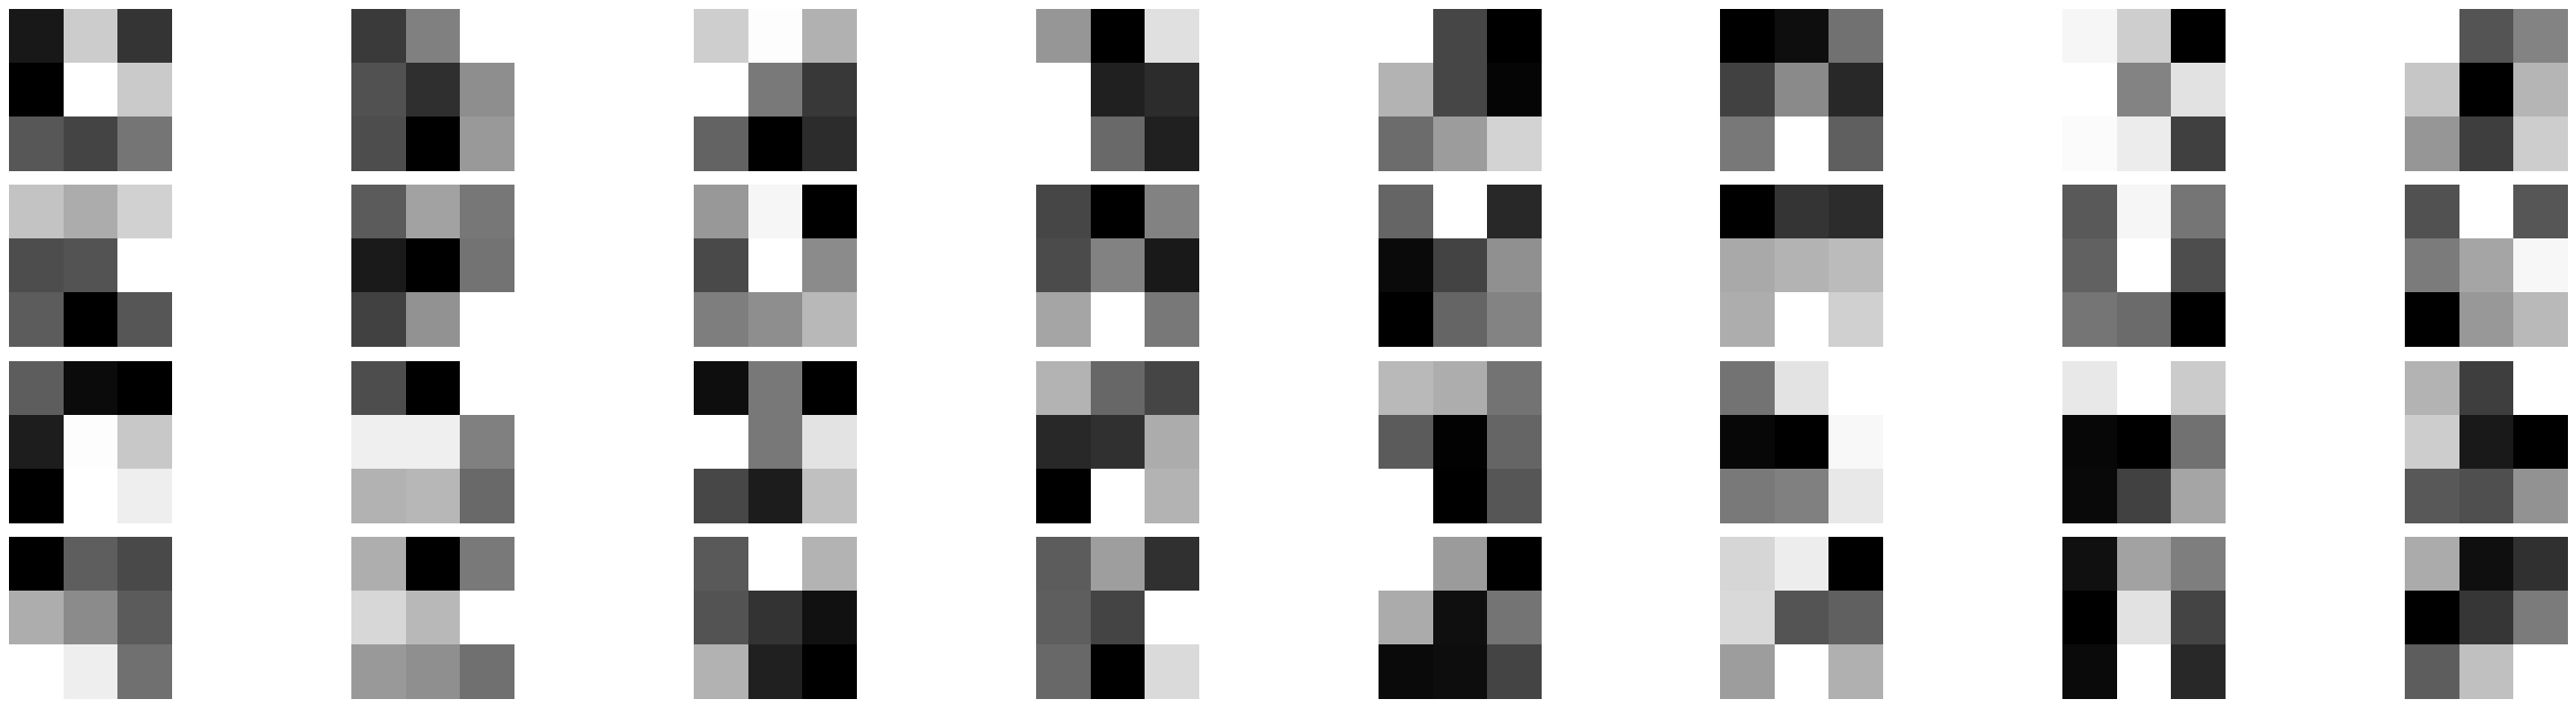

In [11]:
pesos_primeira_camada = model.layers[0].get_weights()[0]

# Normalização dos pesos para valores entre 0 e 255
pesos_normalizados = (pesos_primeira_camada - np.min(pesos_primeira_camada)) / (np.max(pesos_primeira_camada) - np.min(pesos_primeira_camada))
pesos_normalizados *= 255

num_linhas = 4
num_colunas = 8
# Cria a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(32, 8))

# Percorre as imagens e exibe em cada subplot
for i in range(32):
    ax = axs[i // num_colunas, i % num_colunas]  # obtém o subplot correto
    filtro = pesos_normalizados[:, :, :, i]
    filtro_img = np.reshape(filtro, (3, 3, 3))
    # imagem em tons de cinza
    filtro_pb = cv2.cvtColor(filtro_img.astype('uint8'), cv2.COLOR_BGR2GRAY)
    ax.imshow(filtro_pb, cmap='gray')  # exibe a imagem
    ax.axis('off')  # remove os eixos

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe a figura
plt.show()

# 6 - Extra

c:\Users\silla\Desktop\Trabalhos\Visao_Computacional_2024.1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


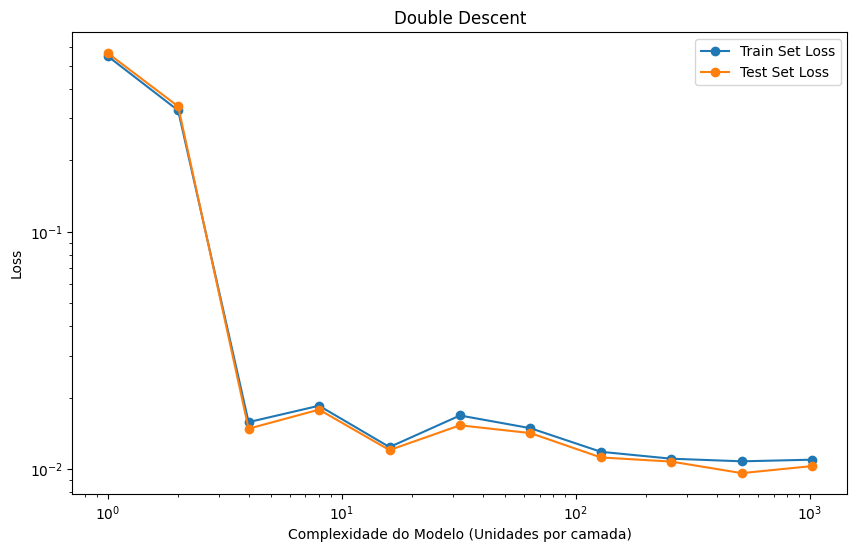

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dados sintéticos
np.random.seed(42)
X = np.random.rand(1000, 1) * 10 - 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Separar os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para criar e treinar um modelo de rede neural com um determinado número de unidades por camada
def train_model(unidades):
    model = Sequential()
    model.add(Dense(unidades, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(unidades, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    return train_loss, test_loss

# Lista de complexidades (número de unidades por camada)
complexidades = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Arrays para armazenar os erros
train_losses = []
test_losses = []

# Treinar modelos com diferentes complexidades e armazenar os erros
for unidades in complexidades:
    train_loss, test_loss = train_model(unidades)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(complexidades, train_losses, label='Train Set Loss', marker='o')
plt.plot(complexidades, test_losses, label='Test Set Loss', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Complexidade do Modelo (Unidades por camada)')
plt.ylabel('Loss')
plt.title('Double Descent')
plt.legend()
plt.show()